# Does gun control make us safer?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.style.use('default')
import dateutil.parser
from datetime import datetime
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [36]:
ms = pd.read_csv("massshooting.csv")
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
Incident Date     1067 non-null object
state             1067 non-null object
city or county    1067 non-null object
address           1048 non-null object
killed            1067 non-null int64
injured           1067 non-null int64
dtypes: int64(2), object(4)
memory usage: 50.1+ KB


In [37]:
def get_date(str_date):
    return datetime.strptime(str_date,'%d-%b-%y')

In [38]:
ms['date'] = ms['Incident Date'].apply(get_date)

In [39]:
ms.head(5)

,Incident Date,state,city or county,address,killed,injured,date
0,24-Jul-16,Ohio,Hamilton,1555 Main St,1,7,2016-07-24
1,24-Jul-16,Florida,Fort Myers,3580 Evans Ave,2,16,2016-07-24
2,23-Jul-16,Ohio,Cincinnati,3400 block of Beekman Street,2,2,2016-07-23
3,23-Jul-16,Texas,Bastrop,202 Childers Drive,4,1,2016-07-23
4,22-Jul-16,Illinois,Kankakee,300 block of North Wildwood Avenue,0,5,2016-07-22


In [40]:
dateutil.parser.parse("2016-07-17")

datetime.datetime(2016, 7, 17, 0, 0)

In [41]:
ms.index=ms['date']
ms.head(2)

,Incident Date,state,city or county,address,killed,injured,date
date,,,,,,,
2016-07-24,24-Jul-16,Ohio,Hamilton,1555 Main St,1,7,2016-07-24
2016-07-24,24-Jul-16,Florida,Fort Myers,3580 Evans Ave,2,16,2016-07-24


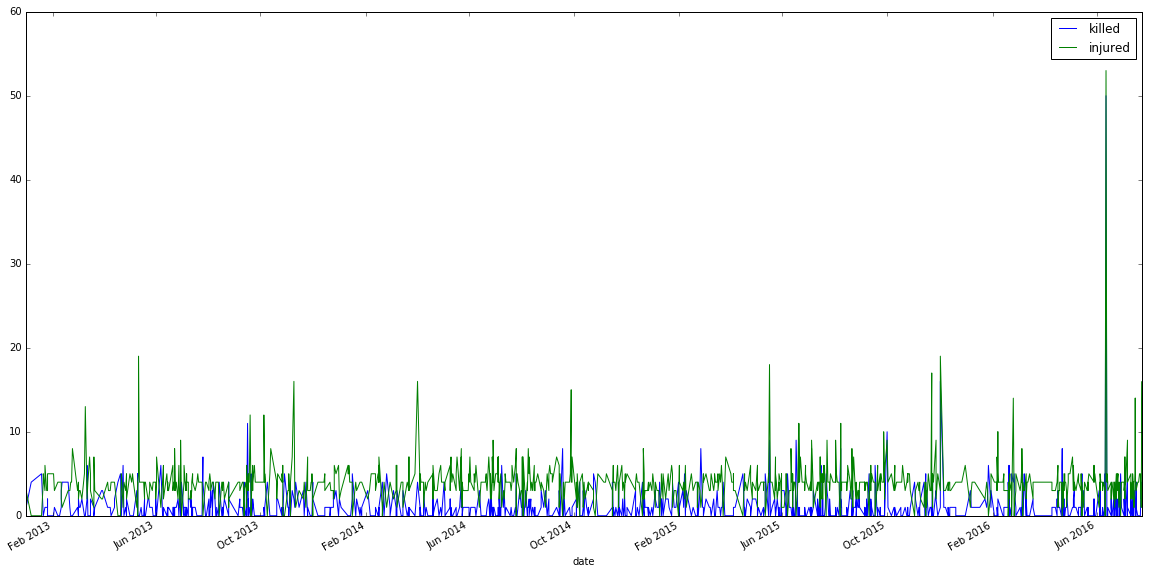

In [42]:
ax = ms.plot(figsize=[20,10])
ax

# plt.savefig('massshooting.pdf',transparent=True)

In [53]:
ms.groupby(by=ms.index.month).sum()

,killed,injured,Operations
1,90,211,NaN
2,111,272,NaN
3,77,299,NaN
4,99,329,NaN
5,107,451,NaN
6,174,605,NaN
7,129,549,NaN
8,110,397,NaN
9,83,341,NaN
10,65,220,NaN


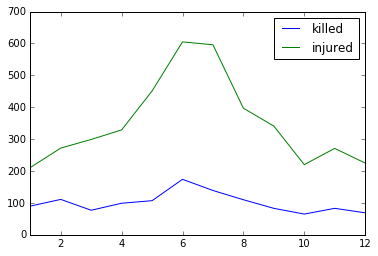

In [45]:
ms.groupby(by=ms.index.month).sum().plot()

In [32]:
state = ms.groupby(by=ms['state']).sum()
state.sort_values(by="killed",ascending=False)
# state.to_csv("state.csv")

,killed,injured,Operations
state,,,
California,143,524,NaN
Florida,130,306,NaN
Texas,116,245,NaN
Georgia,66,202,NaN
Illinois,53,366,NaN
Ohio,48,117,NaN
South Carolina,45,77,NaN
New York,43,221,NaN
Tennessee,38,158,NaN


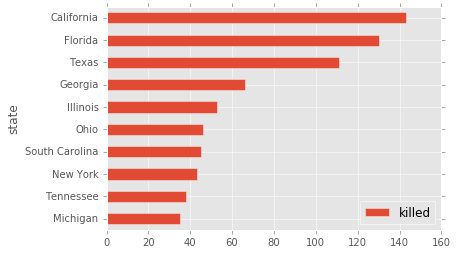

In [80]:
state.sort_values(by="killed",ascending=False).head(10).sort_values(by='killed').plot(kind='barh',y='killed')

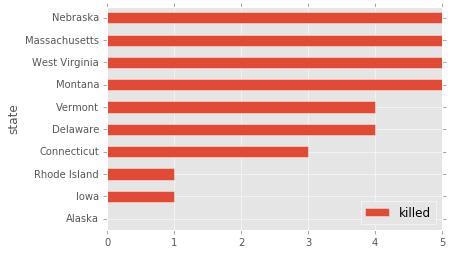

In [81]:
state.sort_values(by="killed",ascending=False).tail(10).sort_values(by='killed').plot(kind='barh',y='killed')

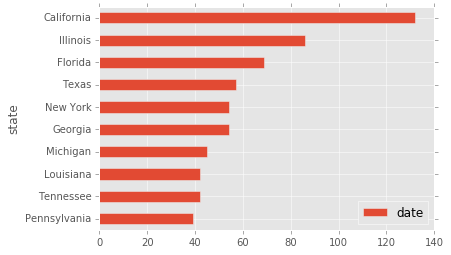

In [88]:
state_count = ms.groupby(by=ms['state']).count()
state_count.sort_values(by='date',ascending=False).head(10).sort_values(by='date').plot(kind='barh',y='date')

In [94]:
ms.groupby(by=ms.index.year).count()

,Incident Date,state,city or county,address,killed,injured,Operations,date
2013,254,254,254,246,254,254,0,254
2014,277,277,277,269,277,277,0,277
2015,332,332,332,329,332,332,0,332
2016,195,195,195,195,195,195,0,195


In [95]:
ms.groupby(by=ms.index.year).sum()

,killed,injured,Operations
2013,288,956,NaN
2014,268,1110,NaN
2015,369,1324,NaN
2016,272,780,NaN


2013    Axes(0.125,0.2;0.775x0.7)
2014    Axes(0.125,0.2;0.775x0.7)
2015    Axes(0.125,0.2;0.775x0.7)
2016    Axes(0.125,0.2;0.775x0.7)
dtype: object

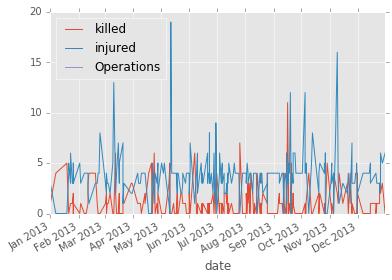

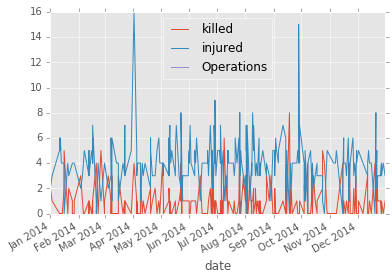

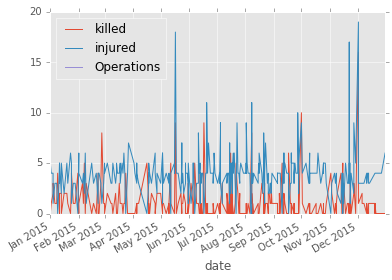

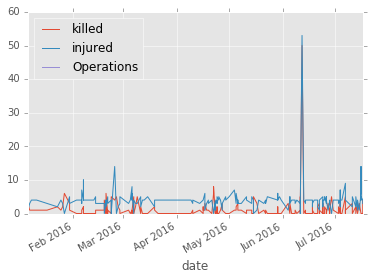

In [90]:
ms.groupby(by=ms.index.year).plot()

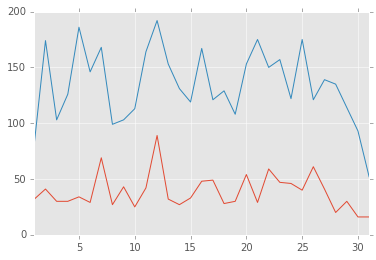

In [92]:
ms.groupby(by=ms.index.day).sum().plot(legend=False)